In [1]:
import pandas as pd
import numpy as np
import nltk as nlt
import re

In [2]:
df = pd.read_csv("E:/data mining lab/agr_hi_train.csv")
df2 = pd.read_csv("E:/data mining lab/agr_hi_dev.csv")

In [3]:




# Define a regular expression to match Devanagari characters
devanagari_pattern = re.compile(r'[\u0900-\u097F]+')

# Identify rows that contain Devanagari characters in 'text' column
devanagari_rows1 = df['text'].str.contains(devanagari_pattern).fillna(False)
devanagari_rows2 = df2['text'].str.contains(devanagari_pattern).fillna(False)

# Drop rows that contain Devanagari characters
df = df.drop(df[devanagari_rows1].index)
df2 = df2.drop(df2[devanagari_rows2].index)

# Print the resulting DataFrame



In [4]:
df['text'] = df['text'].str.lower()
df2['text'] = df2['text'].str.lower()

In [5]:
import string

# Define the punctuation marks to remove
punct = string.punctuation

# Remove the punctuation marks from the text
df['text'] = df['text'].astype(str).apply(lambda x: ''.join(ch for ch in x if ch not in punct))
df2['text'] = df2['text'].astype(str).apply(lambda x: ''.join(ch for ch in x if ch not in punct))

In [6]:
#remove numbers
df['text'] = df['text'].str.replace('\d+', '')
df2['text'] = df2['text'].str.replace('\d+', '')

C:\Users\HP\AppData\Local\Temp\ipykernel_10792\2935725352.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\d+', '')
C:\Users\HP\AppData\Local\Temp\ipykernel_10792\2935725352.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['text'] = df2['text'].str.replace('\d+', '')


In [7]:
#remove urls
import re
df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+', '', x))
df2['text'] = df2['text'].apply(lambda x: re.sub(r'http\S+', '', x))

In [8]:
import nltk
nltk.download('punkt')

df['tokens'] = df['text'].apply(lambda x: nltk.word_tokenize(x))
df2['tokens'] = df2['text'].apply(lambda x: nltk.word_tokenize(x))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load NLTK stopword list and add custom stopwords
stop = set(stopwords.words("english"))
with open('E:/data mining lab/stopwords.txt', 'r') as f:
    custom_stopwords = [word.strip() for word in f]
#stop = nltk_stopwords.union(custom_stopwords)

# Tokenize text column
df['tokens'] = df['text'].apply(lambda x: word_tokenize(x))
df2['tokens']=df2['text'].apply(lambda x: word_tokenize(x))
# Remove stopwords
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop])
df2['tokens'] = df2['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop])
print(stop)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'ain', 'didn', 'aren', 'when', 'with', 'herself', 'mightn', 'on', 'ours', 'than', 'shouldn', 'weren', "you'll", 'isn', "doesn't", 'having', 'my', 'between', 'because', "you're", 'what', 'did', 'nor', 'about', 'other', 'few', 'ourselves', 'after', 'haven', "weren't", 'from', 'our', 'more', 'we', 'the', 'during', 's', 'a', 'yourself', 'whom', 'down', 'your', "haven't", 'both', "you've", 'some', 'has', "isn't", 'who', 'in', 'this', "hasn't", 'do', 'all', 'through', 'against', 'you', 'were', 'me', 'will', 'am', 'or', 'into', 'myself', 'those', 'i', 'an', 'its', 'own', 'just', 'don', 'which', 'wasn', 'wouldn', "you'd", 'himself', "couldn't", "hadn't", 'so', 'until', 'here', 'hadn', "don't", 'their', 'to', 'not', 'him', 'itself', 'over', 'won', 'yourselves', 'out', 'too', 'very', "she's", 'being', 'his', 'if', 'he', "mightn't", 'she', 'why', 'further', 'below', "that'll", 'doing', 'up', 'themselves', 'hers', 'they', 'there', 'how', 'such', 'as', 'same', 'doesn', 'needn', 'theirs', 'no', 'no

In [29]:
df

,source,text,class,tokens
0,facebook_corpus_msr_401470,mahmood ghaznavi aor abdali ko bhol gaya ha tu...,AG,"[mahmood, ghaznavi, aor, abdali, ko, bhol, gay..."
1,facebook_corpus_msr_386695,bhai sal pehle desh me kya tha pehle pta kro d...,AG,"[bhai, sal, pehle, desh, kya, tha, pehle, pta,..."
2,facebook_corpus_msr_373389,chutiya friday ko isliye releae krte kyoki wee...,AG,"[chutiya, friday, ko, isliye, releae, krte, ky..."
4,facebook_corpus_msr_382517,upa walo ne bahot kuch kr diya tha desh k liye,AG,"[upa, walo, ne, bahot, kuch, kr, diya, tha, de..."
5,facebook_corpus_msr_403274,pan ko aadhar se link ki zarurat kuy hai supre...,AG,"[pan, ko, aadhar, se, link, ki, zarurat, kuy, ..."
...,...,...,...,...
11994,facebook_corpus_msr_360273,pakistani border action force bat\nloc se mtr ...,AG,"[pakistani, border, action, force, bat, loc, s..."
11996,facebook_corpus_msr_397726,kisi dushre desho ki soldier k sar katke lana ...,AG,"[kisi, dushre, desho, ki, soldier, k, sar, kat..."
11997,facebook_corpus_msr_1947096,kyoki wo hindu h,AG,"[kyoki, wo, hindu, h]"
11998,facebook_corpus_msr_451870,mileage ki tension na lo india me k upar nai ...,NAG,"[mileage, ki, tension, na, lo, india, k, upar,..."


In [10]:
import re

# Replace any non-alphanumeric characters with a space
df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', ' ', x))

# Alternatively, remove any non-alphanumeric characters
df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]', '', x))


In [11]:
df

,source,text,class,tokens
0,facebook_corpus_msr_401470,mahmoodghaznaviaorabdalikobholgayahatuhazarsaa...,AG,"[mahmood, ghaznavi, aor, abdali, ko, bhol, gay..."
1,facebook_corpus_msr_386695,bhaisalpehledeshmekyathapehleptakrodeshwaiseka...,AG,"[bhai, sal, pehle, desh, kya, tha, pehle, pta,..."
2,facebook_corpus_msr_373389,chutiyafridaykoisliyereleaekrtekyokiweekendked...,AG,"[chutiya, friday, ko, isliye, releae, krte, ky..."
4,facebook_corpus_msr_382517,upawalonebahotkuchkrdiyathadeshkliye,AG,"[upa, walo, ne, bahot, kuch, kr, diya, tha, de..."
5,facebook_corpus_msr_403274,pankoaadharselinkkizaruratkuyhaisupremecourtne...,AG,"[pan, ko, aadhar, se, link, ki, zarurat, kuy, ..."
...,...,...,...,...
11994,facebook_corpus_msr_360273,pakistaniborderactionforcebatlocsemtrandrhamar...,AG,"[pakistani, border, action, force, bat, loc, s..."
11996,facebook_corpus_msr_397726,kisidushredeshokisoldierksarkatkelanaeatopakis...,AG,"[kisi, dushre, desho, ki, soldier, k, sar, kat..."
11997,facebook_corpus_msr_1947096,kyokiwohinduh,AG,"[kyoki, wo, hindu, h]"
11998,facebook_corpus_msr_451870,mileagekitensionnaloindiamekuparnaidegiroadsit...,NAG,"[mileage, ki, tension, na, lo, india, k, upar,..."


In [10]:
df = df.dropna(subset=['text'])

In [37]:
df


,source,text,class,tokens
0,facebook_corpus_msr_401470,mahmoodghaznaviaorabdalikobholgayahatuhazarsaa...,AG,"[mahmood, ghaznavi, aor, abdali, ko, bhol, gay..."
1,facebook_corpus_msr_386695,bhaisalpehledeshmekyathapehleptakrodeshwaiseka...,AG,"[bhai, sal, pehle, desh, kya, tha, pehle, pta,..."
2,facebook_corpus_msr_373389,chutiyafridaykoisliyereleaekrtekyokiweekendked...,AG,"[chutiya, friday, ko, isliye, releae, krte, ky..."
4,facebook_corpus_msr_382517,upawalonebahotkuchkrdiyathadeshkliye,AG,"[upa, walo, ne, bahot, kuch, kr, diya, tha, de..."
5,facebook_corpus_msr_403274,pankoaadharselinkkizaruratkuyhaisupremecourtne...,AG,"[pan, ko, aadhar, se, link, ki, zarurat, kuy, ..."
...,...,...,...,...
11994,facebook_corpus_msr_360273,pakistaniborderactionforcebatlocsemtrandrhamar...,AG,"[pakistani, border, action, force, bat, loc, s..."
11996,facebook_corpus_msr_397726,kisidushredeshokisoldierksarkatkelanaeatopakis...,AG,"[kisi, dushre, desho, ki, soldier, k, sar, kat..."
11997,facebook_corpus_msr_1947096,kyokiwohinduh,AG,"[kyoki, wo, hindu, h]"
11998,facebook_corpus_msr_451870,mileagekitensionnaloindiamekuparnaidegiroadsit...,NAG,"[mileage, ki, tension, na, lo, india, k, upar,..."


In [38]:
#missing_values = df.isna().sum()

In [11]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

# Initialize a lemmatizer object
lemmatizer = WordNetLemmatizer()

# Lemmatize the text data
df['tokens'] = df['tokens'].apply(lambda x: ' '.join(x))
df['tokens'] = df['tokens'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
df2['tokens'] = df2['tokens'].apply(lambda x: ' '.join(x))
df2['tokens'] = df2['tokens'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [18]:
#dont run
import nltk

from nltk.stem import PorterStemmer

# Initialize a stemmer object
porter = PorterStemmer()







# Stem the text data
df['tokens'] = df['tokens'].apply(lambda x: ' '.join(x))
df['tokenx'] = df['tokens'].apply(lambda x: ' '.join([porter.stem(word) for word in x.split()]))
df2['tokens'] = df2['tokens'].apply(lambda x: ' '.join(x))
df2['tokens'] = df2['tokens'].apply(lambda x: ' '.join([porter.stem(word) for word in x.split()]))



In [19]:
#dont run
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer()

# Create a document-term matrix
doc_term_matrix = tfidf_vectorizer.fit_transform(df['text'])


In [15]:
from sklearn.model_selection import train_test_split

# Define text data and labels
X_train = df['tokens']
y_train = df['class']
X_test =df2['tokens']
y_test=df2['class']


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vec = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vec = vectorizer.transform(X_test)


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming that 'X' contains the text data and 'y' contains the target labels


# Train the Bernoulli Naive Bayes classifier
clf = BernoulliNB()
clf.fit(X_train_vec, y_train)

# Make predictions on the test data
y_predNB = clf.predict(X_test_vec)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_predNB)
precision = precision_score(y_test, y_predNB, pos_label='AG')
recall = recall_score(y_test, y_predNB, pos_label='AG')
f1 = f1_score(y_test, y_predNB, pos_label='AG')


print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.8549
Precision: 0.8547
Recall: 1.0
F1 Score: 0.9217


In [18]:
from sklearn.svm import SVC

# Create an SVM classifier object
svm = SVC(kernel='linear',random_state=42)

# Fit the SVM classifier on the training data
svm.fit(X_train_vec, y_train)

# Predict the labels of the testing data using the trained SVM classifier
y_pred = svm.predict(X_test_vec)
y_pred2=svm.predict(X_train_vec)


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute the evaluation metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='AG')
recall = recall_score(y_test, y_pred, pos_label='AG')
f1 = f1_score(y_test, y_pred, pos_label='AG')

# Print the evaluation metrics

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.8753
Precision: 0.8768
Recall: 0.9936
F1 Score: 0.9316


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
clfdt = DecisionTreeClassifier(random_state=42)
clfdt.fit(X_train_vec, y_train)

# Predict the labels of the testing data using the trained decision tree classifier
y_preddt = clfdt.predict(X_test_vec)

In [21]:
accuracy = accuracy_score(y_test, y_preddt)
precision = precision_score(y_test, y_preddt, pos_label='AG')
recall = recall_score(y_test, y_preddt, pos_label='AG')
f1 = f1_score(y_test, y_preddt, pos_label='AG')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.7998180163785259
Precision: 0.8963044677330392
Recall: 0.8657432072456047
F1 score: 0.8807588075880759


In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest Classifier on the training data
rfc.fit(X_train_vec, y_train)

# Predict the labels of the testing data using the trained Random Forest Classifier
y_predrfc = rfc.predict(X_test_vec)

# Evaluate the performance of the Random Forest Classifier
accuracy = accuracy_score(y_test, y_predrfc)
precision = precision_score(y_test, y_predrfc, pos_label='AG')
recall = recall_score(y_test, y_predrfc, pos_label='AG')
f1 = f1_score(y_test, y_preddt, pos_label='AG')

In [23]:
print(accuracy)
print(recall)
print(precision)
print(f1)

0.8726114649681529
0.9706979222163026
0.8900830483634588
0.8807588075880759


In [ ]:
#dont run
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# Load the data
train_data = df.sample(frac=0.8, random_state=42)
test_data = df.drop(train_data.index)
texts_train = train_data['text'].tolist()
labels_train = train_data['class'].tolist()
texts_test = test_data['text'].tolist()
labels_test = test_data['class'].tolist()
# Tokenize the text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts_train)
sequences_train = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)
x_train = pad_sequences(sequences_train, maxlen=100)
x_test = pad_sequences(sequences_test, maxlen=100)

# Convert the labels to numerical values
y_train = np.array([1 if label == 'AG' else 0 for label in labels_train])
y_test = np.array([1 if label == 'AG' else 0 for label in labels_test])

# Define the model
def create_model(units=64, dropout_rate=0.5, learning_rate=0.001):
    model = Sequential()
    model.add(Embedding(input_dim=10000, output_dim=64, input_length=100))
    model.add(LSTM(units=units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create the classifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameters to tune
param_grid = {
    'units': [32, 64, 128],
    'dropout_rate': [0.3, 0.5, 0.7],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Tune the hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(x_train, y_train)

# Print the best results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


In [24]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=0)
lg.fit(X_train_vec, y_train)
y_pred_lg = lg.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred_lg)
precision = precision_score(y_test, y_pred_lg, pos_label='AG')
recall = recall_score(y_test, y_pred_lg, pos_label='AG')
f1 = f1_score(y_test, y_pred_lg, pos_label='AG')

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.8644222020018199
Precision: 0.8646651270207852
Recall: 0.9973361747469366
F1 Score: 0.9262741217219199


In [25]:

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Assuming the dataset is loaded into 'df' DataFrame


# Creating a Bagging Classifier with Random Forest as the base estimator
bagging_classifier = BaggingClassifier(
    base_estimator=RandomForestClassifier(),
    n_estimators=10, # Number of base estimators to use
    random_state=42
)

# Creating a CountVectorizer to convert text to numerical features


# Training the model
bagging_classifier.fit(X_train_vec, y_train)

# Evaluating the model on the testing data
y_predrfabg = bagging_classifier.predict(X_test_vec)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          AG       0.88      0.99      0.93      1877
         NAG       0.83      0.18      0.30       321

    accuracy                           0.88      2198
   macro avg       0.85      0.59      0.62      2198
weighted avg       0.87      0.88      0.84      2198



In [26]:

accuracy = accuracy_score(y_test, y_predrfabg)
precision = precision_score(y_test, y_predrfabg, pos_label='AG')
recall = recall_score(y_test, y_predrfabg, pos_label='AG')
f1 = f1_score(y_test, y_predrfabg, pos_label='AG')

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.873066424021838
Precision: 0.8837656099903939
Recall: 0.9802876931273309
F1 Score: 0.9295276584996212


In [10]:
#dont run
print(df)

                            source  \
0       facebook_corpus_msr_401470   
1       facebook_corpus_msr_386695   
2       facebook_corpus_msr_373389   
4       facebook_corpus_msr_382517   
5       facebook_corpus_msr_403274   
...                            ...   
11994   facebook_corpus_msr_360273   
11996   facebook_corpus_msr_397726   
11997  facebook_corpus_msr_1947096   
11998   facebook_corpus_msr_451870   
11999   facebook_corpus_msr_410971   

                                                    text class  \
0      mahmood ghaznavi aor abdali ko bhol gaya ha tu...    AG   
1      bhai sal pehle desh me kya tha pehle pta kro d...    AG   
2      chutiya friday ko isliye releae krte kyoki wee...    AG   
4         upa walo ne bahot kuch kr diya tha desh k liye    AG   
5      pan ko aadhar se link ki zarurat kuy hai supre...    AG   
...                                                  ...   ...   
11994  pakistani border action force bat\nloc se mtr ...    AG   
11996  kisi dus

In [11]:
#dont run
print(df2)

                           source  \
0      facebook_corpus_msr_333008   
1      facebook_corpus_msr_690306   
2      facebook_corpus_msr_382520   
3      facebook_corpus_msr_401748   
4      facebook_corpus_msr_656339   
...                           ...   
2996   facebook_corpus_msr_356273   
2997   facebook_corpus_msr_349781   
2998  facebook_corpus_msr_1906980   
2999  facebook_corpus_msr_1391645   
3000  facebook_corpus_msr_2082648   

                                                   text class  \
0     randtv tumhare najayaz baap is area hai ki wah...    AG   
1           first stage par dus jootey khaye grover  se    AG   
2     salman aur aamir ki kounsi movie release huyee...    AG   
3     wk aur bhakt aa gya  abe americans ka bolna h ...    AG   
4     beta to tu apne baap ka hai permission to tu m...   NAG   
...                                                 ...   ...   
2996  agar sarkar ne ab bhi kush nahi kia to ak din ...    AG   
2997  kuch bhi nahi kiya par ek kaa

11077

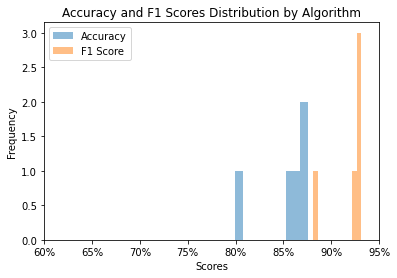

In [27]:
#run kro
import matplotlib.pyplot as plt
import numpy as np

# Define accuracy and F1 score values for each algorithm
algorithms = ['SVM',
'Naïve Bayes',
'Logistic Regression',
'Decision Tree',
'Random Forest(Bagging)']

accuracy = [0.8753,
0.8549,
0.8644,
0.7998,
0.8730
]
f1_score = [0.9316,
0.9295,
0.9262,
0.8807,
0.9295
]

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create the histogram of accuracy scores
n, bins, patches = ax.hist(accuracy, alpha=0.5, label='Accuracy')

# Create the histogram of F1 scores
n, bins, patches = ax.hist(f1_score, alpha=0.5, label='F1 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Scores')
ax.set_ylabel('Frequency')
ax.set_title('Accuracy and F1 Scores Distribution by Algorithm')
ax.set_xticks(np.arange(0.6, 1.0, 0.05))
ax.set_xticklabels(['60%', '65%', '70%', '75%', '80%', '85%', '90%', '95%'])
ax.legend()

# Show the plot
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_4068\1865885996.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


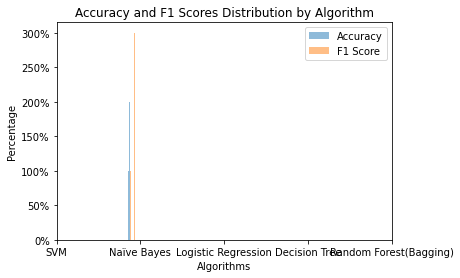

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Define accuracy and F1 score values for each algorithm
algorithms = ['SVM','Naïve Bayes','Logistic Regression','Decision Tree','Random Forest(Bagging)']

accuracy = [0.8753,0.8549,0.8644,0.7998,0.8730]
f1_score = [0.9316,0.9295,0.9262,0.8807,0.9295]


# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create the histogram of accuracy scores
n, bins, patches = ax.hist(accuracy, alpha=0.5, label='Accuracy')

# Create the histogram of F1 scores
n, bins, patches = ax.hist(f1_score, alpha=0.5, label='F1 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Algorithms')
ax.set_ylabel('Percentage')
ax.set_title('Accuracy and F1 Scores Distribution by Algorithm')
ax.set_xticks(np.arange(len(algorithms)))
ax.set_xticklabels(algorithms)
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
ax.legend()

# Show the plot
plt.show()


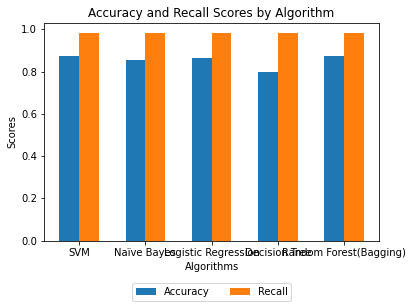

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Define accuracy and recall values for each algorithm


# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Set the width of each bar
bar_width = 0.3


# Set the x position of each bar
x_pos = np.arange(len(algorithms))

# Plot the accuracy bars
ax.bar(x_pos, accuracy, width=bar_width, label='Accuracy')

# Plot the recall bars
ax.bar(x_pos + bar_width, recall, width=bar_width, label='Recall')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Algorithms')
ax.set_ylabel('Scores')
ax.set_title('Accuracy and Recall Scores by Algorithm')
ax.set_xticks(x_pos + bar_width / 2)
ax.set_xticklabels(algorithms)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)

# Show the plot
plt.show()


NameError: name 'bar_padding' is not defined

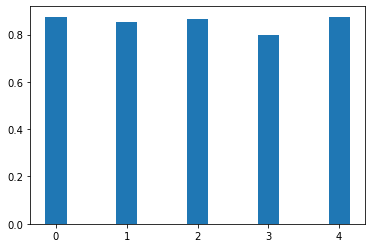

In [30]:
#dont run
import matplotlib.pyplot as plt
import numpy as np

# Define accuracy and recall values for each algorithm


# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Set the width of each bar and the padding between the bars
bar_width = 0.3


# Set the x position of each bar
x_pos = np.arange(len(algorithms))

# Plot the accuracy bars
ax.bar(x_pos, accuracy, width=bar_width, label='Accuracy')

# Plot the recall bars
ax.bar(x_pos + bar_width + bar_padding, recall, width=bar_width, label='Recall')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Algorithms')
ax.set_ylabel('Scores')
ax.set_title('Accuracy and Recall Scores by Algorithm')
ax.set_xticks(x_pos + bar_width / 2)
ax.set_xticklabels(algorithms)
ax.legend()

# Show the plot
plt.show()


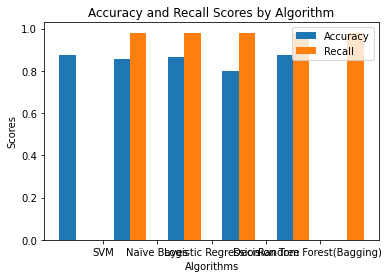

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Define accuracy and recall values for each algorithm


# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Set the width of each bar and the padding between the bars
bar_width = 0.3
bar_padding = 1

# Set the x position of each bar
x_pos = np.arange(len(algorithms))

# Plot the accuracy bars
ax.bar(x_pos, accuracy, width=bar_width, label='Accuracy')

# Plot the recall bars
ax.bar(x_pos + bar_width + bar_padding, recall, width=bar_width, label='Recall')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Algorithms')
ax.set_ylabel('Scores')
ax.set_title('Accuracy and Recall Scores by Algorithm')
ax.set_xticks(x_pos + bar_width / 2 + bar_padding / 2)
ax.set_xticklabels(algorithms)
ax.legend()

# Show the plot
plt.show()


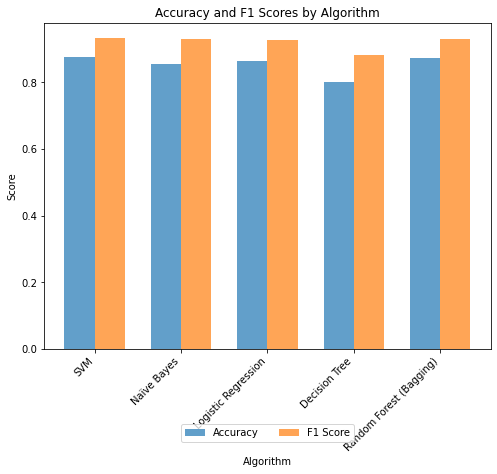

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Define algorithm names, accuracy, and F1 scores
algorithms = ['SVM', 'Naïve Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest (Bagging)']
accuracy = [0.8753, 0.8549, 0.8644, 0.7998, 0.8730]
f1_score = [0.9316, 0.9295, 0.9262, 0.8807, 0.9295]

# Set the figure size
plt.figure(figsize=(8, 6))

# Set the bar width and the x positions of the bars
bar_width = 0.35
x_pos = np.arange(len(algorithms))

# Plot the accuracy bars
plt.bar(x_pos, accuracy, width=bar_width, alpha=0.7, label='Accuracy')

# Plot the F1 score bars
plt.bar(x_pos + bar_width, f1_score, width=bar_width, alpha=0.7, label='F1 Score')

# Set the x-axis ticks and labels
plt.xticks(x_pos + bar_width/2, algorithms, rotation=45, ha='right')

# Add axis labels and a title
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.title('Accuracy and F1 Scores by Algorithm')

# Add a legend at the bottom of the plot
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)

# Show the plot
plt.show()


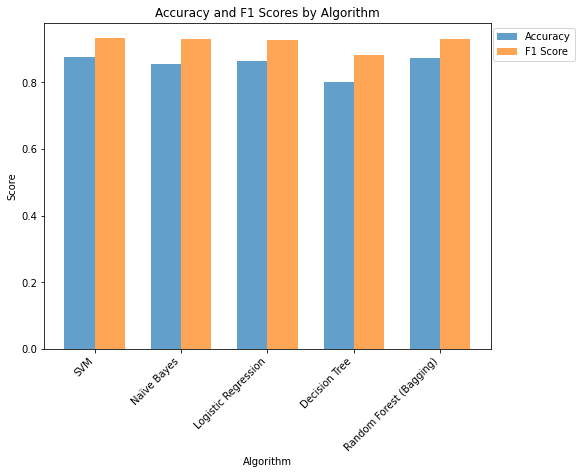

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Define algorithm names, accuracy, and F1 scores
algorithms = ['SVM', 'Naïve Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest (Bagging)']
accuracy = [0.8753, 0.8549, 0.8644, 0.7998, 0.8730]
f1_score = [0.9316, 0.9295, 0.9262, 0.8807, 0.9295]

# Set the figure size
plt.figure(figsize=(8, 6))

# Set the bar width and the x positions of the bars
bar_width = 0.35
x_pos = np.arange(len(algorithms))

# Plot the accuracy bars
plt.bar(x_pos, accuracy, width=bar_width, alpha=0.7, label='Accuracy')

# Plot the F1 score bars
plt.bar(x_pos + bar_width, f1_score, width=bar_width, alpha=0.7, label='F1 Score')

# Set the x-axis ticks and labels
plt.xticks(x_pos + bar_width/2, algorithms, rotation=45, ha='right')

# Add axis labels and a title
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.title('Accuracy and F1 Scores by Algorithm')

# Add a legend at the top right corner outside the plot area
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), ncol=1)

# Show the plot
plt.show()


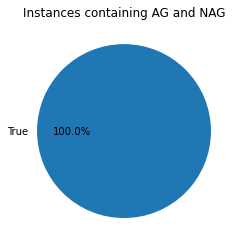

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame

# Count the number of instances containing "AG" and "NAG"
counts = df['class'].str.contains('AG').value_counts()

# Create a pie chart of the results
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Instances containing AG and NAG')
plt.show()


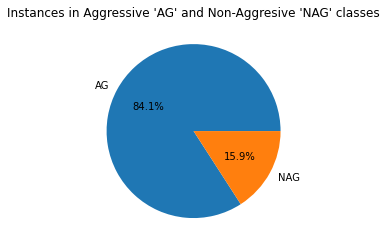

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your cyberbullying dataset into a DataFrame


# Count the number of instances in each class
class_counts = df['class'].value_counts()

# Create a pie chart of the results
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title("Instances in Aggressive 'AG' and Non-Aggresive 'NAG' classes")
plt.show()
